# Практическая работа

In [1]:
# импорт пакетов
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [2]:
df = pd.read_csv('data/D_clients.csv')
D_work = pd.read_csv('data/D_work.csv')
D_pens = pd.read_csv('data/D_pens.csv')
D_salary = pd.read_csv('data/D_salary.csv')
D_loan = pd.read_csv('data/D_loan.csv')
D_last_credit = pd.read_csv('data/D_last_credit.csv')
D_job = pd.read_csv('data/D_job.csv')
D_close_loan = pd.read_csv('data/D_close_loan.csv')
D_target = pd.read_csv('data/D_target.csv')

In [3]:
def merge_clients(df, data, left_on, right_on, suffix):
    df = df.merge(data, left_on=left_on, right_on=right_on,
                  how='left', suffixes=("", f"_{suffix}"))
    return df

In [4]:
df = merge_clients(df, D_target, 'ID', 'ID_CLIENT', 'target')
df = merge_clients(df, D_salary, 'ID', 'ID_CLIENT', 'salary')
df = merge_clients(df, D_loan, 'ID', 'ID_CLIENT', 'loan')
df = merge_clients(df, D_last_credit, 'ID', 'ID_CLIENT', 'last_credit')
df = merge_clients(df, D_job, 'ID', 'ID_CLIENT', 'job')

df = merge_clients(df, D_work, 'SOCSTATUS_WORK_FL', 'FLAG', 'work')
df = merge_clients(df, D_pens, 'SOCSTATUS_PENS_FL', 'FLAG', 'pens')
df = merge_clients(df, D_close_loan, 'ID_LOAN', 'ID_LOAN', 'closed_loan')

In [5]:
df.drop(columns=['ID_CLIENT', 'ID_CLIENT_salary', 'ID_CLIENT_loan',
                 'ID_CLIENT_last_credit', 'ID_CLIENT_job', 'ID_work',
                 'ID_pens', 'FLAG', 'FLAG_pens'], axis=1, inplace=True)

In [6]:
df = df.drop_duplicates(subset=['AGREEMENT_RK'], keep='last')
df

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,FAMILY_INCOME,PERSONAL_INCOME,ID_LOAN,CREDIT,TERM,FST_PAYMENT,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,COMMENT,COMMENT_pens,CLOSED_FL
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,60099204.0,1.0,от 20000 до 50000 руб.,25000.0,1.753791e+09,5588.0,6.0,1000.0,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0,не работает,пенсионер,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,62244665.0,0.0,от 10000 до 20000 руб.,10000.0,1.753796e+09,19498.0,12.0,0.0,Торговля,Специалист,Участие в основ. деятельности,5.0,не работает,пенсионер,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,61050759.0,0.0,от 20000 до 50000 руб.,30000.0,1.753792e+09,15470.0,3.0,15000.0,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0,не работает,не пенсионер,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,62079659.0,0.0,от 20000 до 50000 руб.,25000.0,1.753796e+09,13960.0,6.0,2500.0,Государственная служба,Специалист,Участие в основ. деятельности,3.0,не работает,пенсионер,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,66583553.0,0.0,от 10000 до 20000 руб.,15000.0,1.753802e+09,11890.0,6.0,8000.0,Другие сферы,Специалист,Участие в основ. деятельности,12.0,не работает,пенсионер,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22307,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,Чувашия,Чувашия,0,0,66751099.0,0.0,от 5000 до 10000 руб.,8000.0,1.753803e+09,11750.0,4.0,1900.0,Сборочные производства,Специалист,Участие в основ. деятельности,36.0,не работает,пенсионер,1.0
22308,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,Карелия,Карелия,0,0,64562377.0,0.0,от 20000 до 50000 руб.,12000.0,1.753800e+09,12350.0,6.0,1380.0,Торговля,Специалист,Участие в основ. деятельности,24.0,не работает,пенсионер,0.0
22309,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0,62236542.0,0.0,от 5000 до 10000 руб.,9000.0,1.753796e+09,4915.0,10.0,2000.0,Торговля,Специалист,Участие в основ. деятельности,36.0,не работает,пенсионер,0.0
22310,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,66739926.0,0.0,от 10000 до 20000 руб.,12000.0,1.753803e+09,5860.0,3.0,2000.0,Транспорт,Специалист,Участие в основ. деятельности,36.0,не работает,пенсионер,1.0


## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

## Описательные статистики

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21903 entries, 0 to 22311
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21903 non-null  int64  
 1   AGE                      21903 non-null  int64  
 2   GENDER                   21903 non-null  int64  
 3   EDUCATION                21903 non-null  object 
 4   MARITAL_STATUS           21903 non-null  object 
 5   CHILD_TOTAL              21903 non-null  int64  
 6   DEPENDANTS               21903 non-null  int64  
 7   SOCSTATUS_WORK_FL        21903 non-null  int64  
 8   SOCSTATUS_PENS_FL        21903 non-null  int64  
 9   REG_ADDRESS_PROVINCE     21903 non-null  object 
 10  FACT_ADDRESS_PROVINCE    21903 non-null  object 
 11  POSTAL_ADDRESS_PROVINCE  21903 non-null  object 
 12  FL_PRESENCE_FL           21903 non-null  int64  
 13  OWN_AUTO                 21903 non-null  int64  
 14  AGREEMENT_RK          

In [8]:
description_cat = df.describe(include=['object'])
description_cat.to_csv('data/description_cat.csv', index= True)
description_cat

,EDUCATION,MARITAL_STATUS,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FAMILY_INCOME,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,COMMENT,COMMENT_pens
count,21903,21903,21903,21903,21903,21126,19363,19363,19363,21903,21903
unique,7,5,81,81,80,5,31,12,10,2,2
top,Среднее,Состою в браке,Кемеровская область,Кемеровская область,Кемеровская область,от 10000 до 20000 руб.,Торговля,Специалист,Участие в основ. деятельности,не работает,пенсионер
freq,8454,13652,1257,1257,1257,10100,3294,11046,15963,20048,18995


In [9]:
description_num = df.describe(include=['int64', 'float64'],
            percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
description_num.to_csv('data/description_num.csv', index= True)
description_num

,ID,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,PERSONAL_INCOME,ID_LOAN,CREDIT,TERM,FST_PAYMENT,WORK_TIME,CLOSED_FL
count,2.190300e+04,21903.000000,21903.000000,21903.000000,21903.000000,21903.000000,21903.000000,21903.000000,21903.000000,2.112600e+04,21126.000000,21126.000000,2.112600e+04,21126.000000,21126.000000,21126.000000,1.935900e+04,21126.000000
mean,1.068131e+08,40.543989,0.656029,1.117701,0.668904,0.915308,0.132767,0.326120,0.126878,6.624596e+07,0.112894,13662.638195,1.753801e+09,14448.221029,8.079760,3298.382406,2.355374e+02,0.541797
std,4.464600e+03,11.466963,0.475042,0.991715,0.814525,0.278429,0.339331,0.468802,0.333118,4.687874e+06,0.316471,8501.755008,6.098695e+03,11818.900722,4.081354,4980.697953,2.061229e+04,0.498262
min,1.068044e+08,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.991015e+07,0.000000,24.000000,1.753791e+09,2000.000000,3.000000,0.000000,1.000000e+00,0.000000
1%,1.068046e+08,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.993026e+07,0.000000,4300.000000,1.753791e+09,2498.250000,3.000000,0.000000,3.000000e+00,0.000000
5%,1.068054e+08,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.038457e+07,0.000000,5100.000000,1.753792e+09,3497.250000,3.000000,0.000000,6.000000e+00,0.000000
10%,1.068065e+08,26.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.114709e+07,0.000000,6000.000000,1.753793e+09,4290.930000,3.000000,399.000000,1.200000e+01,0.000000
25%,1.068093e+08,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.218150e+07,0.000000,8000.000000,1.753796e+09,6374.835000,6.000000,1000.000000,2.400000e+01,0.000000
50%,1.068141e+08,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.631824e+07,0.000000,12000.000000,1.753801e+09,11345.000000,6.000000,2000.000000,5.000000e+01,1.000000
75%,1.068168e+08,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,6.723131e+07,0.000000,16000.000000,1.753807e+09,18998.500000,10.000000,4000.000000,1.200000e+02,1.000000


## Графики распределений

In [10]:
def make_countplot(variable: str, title: str, label: str, order: list, xticks_: list, rotation=True):
    sns.countplot(data=df, x=variable, order=order, palette='magma')
    if rotation:
        plt.xticks([i for i in range(len(xticks_))], xticks_, rotation=90)
    else:
        plt.xticks([i for i in range(len(xticks_))], xticks_)
    plt.xlabel(label)
    plt.ylabel('Количество людей')
    plt.title(title)
    plt.plot()

In [11]:
def make_histplot(variable: str, label:str, title:str):
    sns.histplot(df[variable], color='#5f187f')
    plt.xlabel(label)
    plt.ylabel('Количество людей')
    plt.title(title)
    plt.plot()

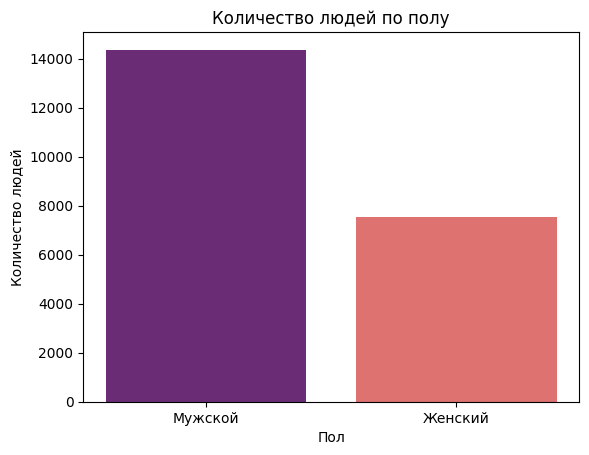

In [12]:
make_countplot('GENDER', 'Количество людей по полу',
               'Пол', [1,0], ['Мужской','Женский'], rotation=False)
#plt.savefig('pictures/gender.png')

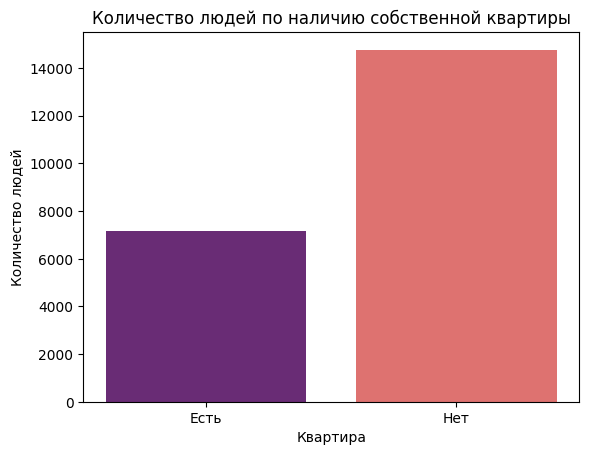

In [13]:
make_countplot('FL_PRESENCE_FL', 'Количество людей по наличию собственной квартиры',
               'Квартира', [1,0], ['Есть', 'Нет'], rotation=False)
#plt.savefig('pictures/flat.png')

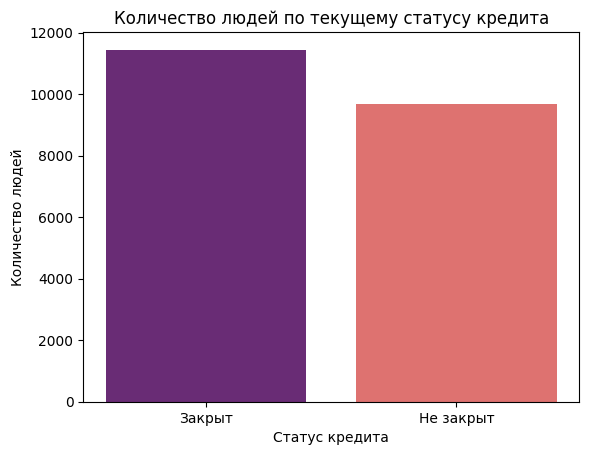

In [14]:
make_countplot('CLOSED_FL', 'Количество людей по текущему статусу кредита',
               'Статус кредита', [1,0], ['Закрыт', 'Не закрыт'], rotation=False)
#plt.savefig('pictures/credit_status.png')

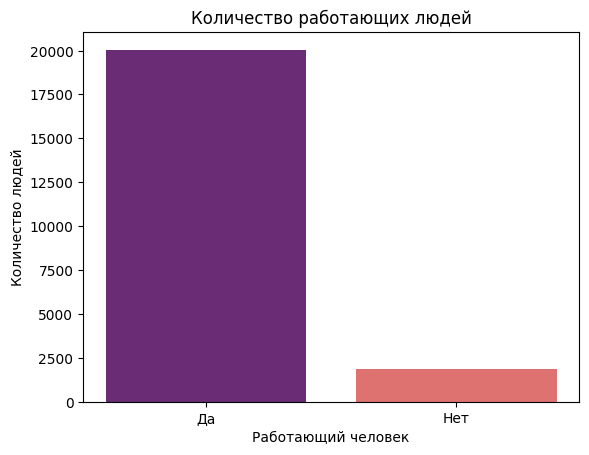

In [15]:
make_countplot('SOCSTATUS_WORK_FL', 'Количество работающих людей',
               'Работающий человек', [1,0], ['Да', 'Нет'], rotation=False)
#plt.savefig('pictures/working.png')

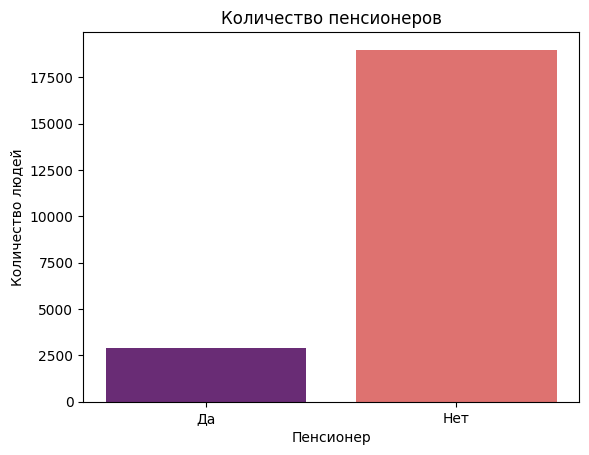

In [16]:
make_countplot('SOCSTATUS_PENS_FL', 'Количество пенсионеров',
               'Пенсионер', [1,0], ['Да', 'Нет'], rotation=False)
#plt.savefig('pictures/pens.png')

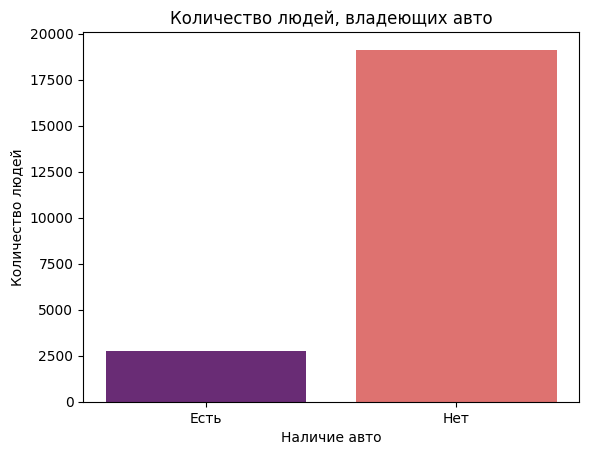

In [17]:
make_countplot('OWN_AUTO', 'Количество людей, владеющих авто', 'Наличие авто',
               [1,0], ['Есть', 'Нет'], rotation=False)
#plt.savefig('pictures/auto.png')

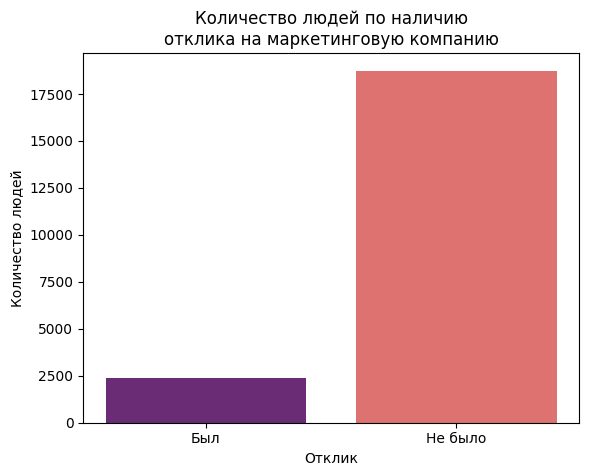

In [18]:
make_countplot('TARGET', 'Количество людей по наличию\nотклика на маркетинговую компанию',
               'Отклик', [1,0], ['Был', 'Не было'], rotation=False)
#plt.savefig('pictures/target.png')

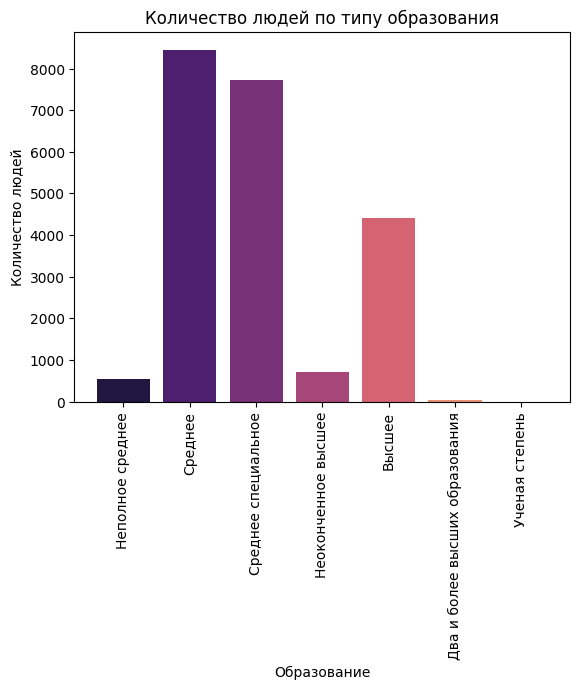

In [19]:
make_countplot('EDUCATION', 'Количество людей по типу образования',
               'Образование', ['Неполное среднее', 'Среднее', 'Среднее специальное', 'Неоконченное высшее',
                               'Высшее', 'Два и более высших образования', 'Ученая степень'],
              ['Неполное среднее', 'Среднее', 'Среднее специальное', 'Неоконченное высшее',
               'Высшее', 'Два и более высших образования', 'Ученая степень'])
#plt.savefig('pictures/education.png')

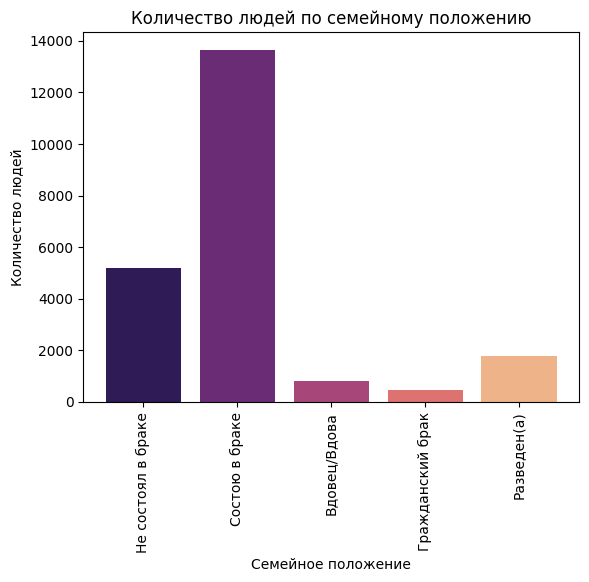

In [20]:
make_countplot('MARITAL_STATUS', 'Количество людей по семейному положению',
               'Семейное положение', pd.unique(df['MARITAL_STATUS']),
               pd.unique(df['MARITAL_STATUS']))
#plt.savefig('pictures/family_status.png')

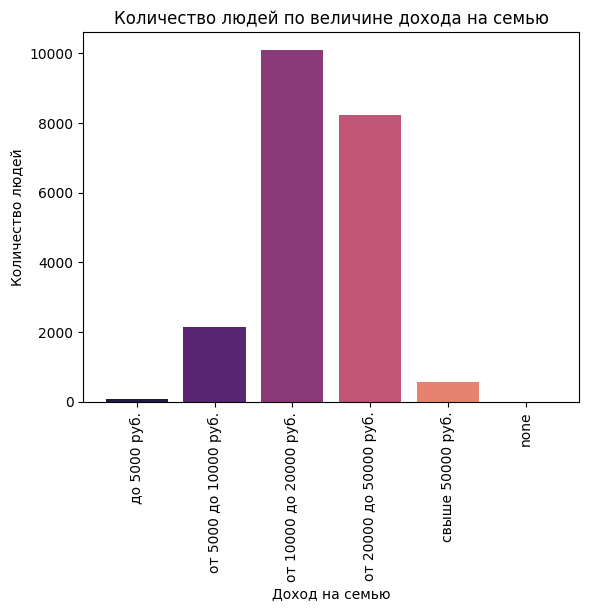

In [21]:
make_countplot('FAMILY_INCOME', 'Количество людей по величине дохода на семью',
               'Доход на семью',
               ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.',
                'от 20000 до 50000 руб.', 'свыше 50000 руб.', 'nan'],
               ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.',
                'от 20000 до 50000 руб.', 'свыше 50000 руб.', 'none'])

#plt.savefig('pictures/family_revenue.png')

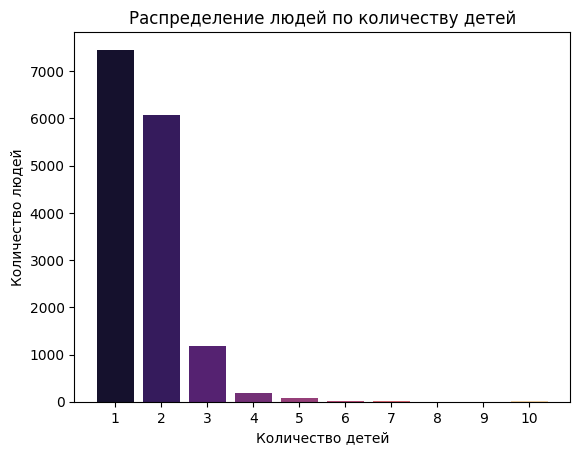

In [22]:
make_countplot('CHILD_TOTAL', 'Распределение людей по количеству детей', 'Количество детей',
               [1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], rotation=False)
#plt.savefig('pictures/children.png')

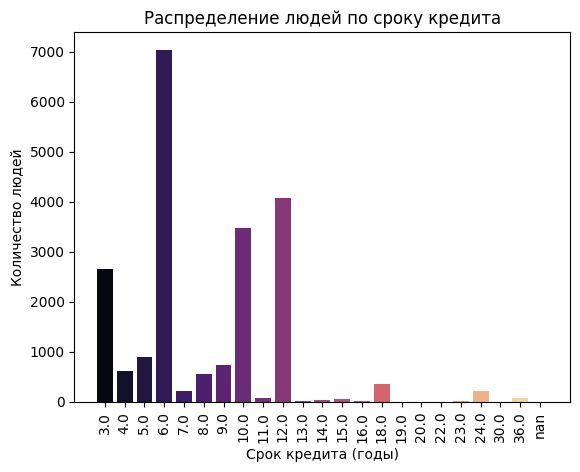

In [23]:
make_countplot('TERM', 'Распределение людей по сроку кредита', 'Срок кредита (годы)',
               [ 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14.,
                15., 16., 18., 19., 20., 22., 23., 24., 30., 36., 'nan'],
               [ 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14.,
                15., 16., 18., 19., 20., 22., 23., 24., 30., 36., 'nan'])
#plt.savefig('pictures/term_credit.png')

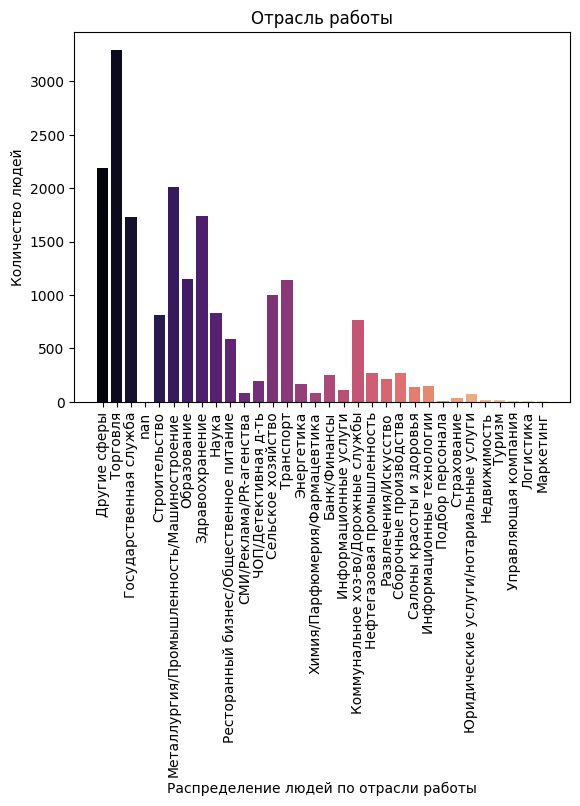

In [24]:
make_countplot('GEN_INDUSTRY', 'Отрасль работы', 'Распределение людей по отрасли работы',
               pd.unique(df['GEN_INDUSTRY']), pd.unique(df['GEN_INDUSTRY']))
#plt.savefig('pictures/industry_work.png')

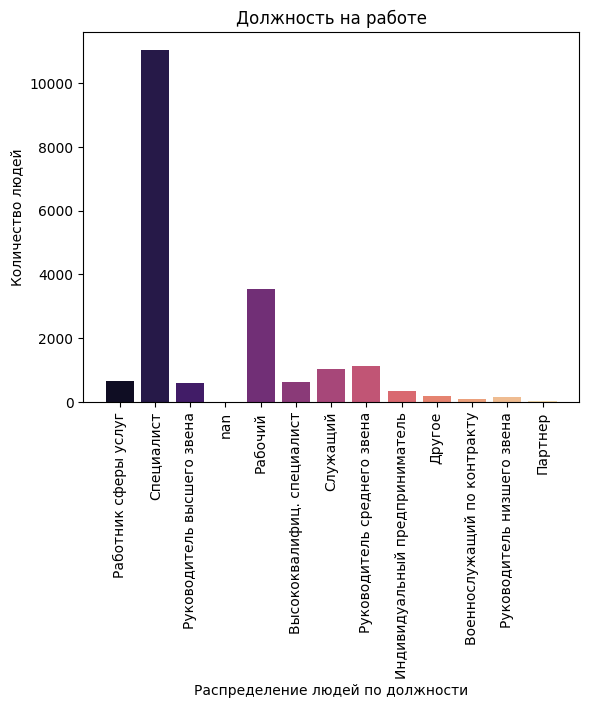

In [25]:
make_countplot('GEN_TITLE', 'Должность на работе', 'Распределение людей по должности',
               pd.unique(df['GEN_TITLE']), pd.unique(df['GEN_TITLE']))
#plt.savefig('pictures/work_title.png')

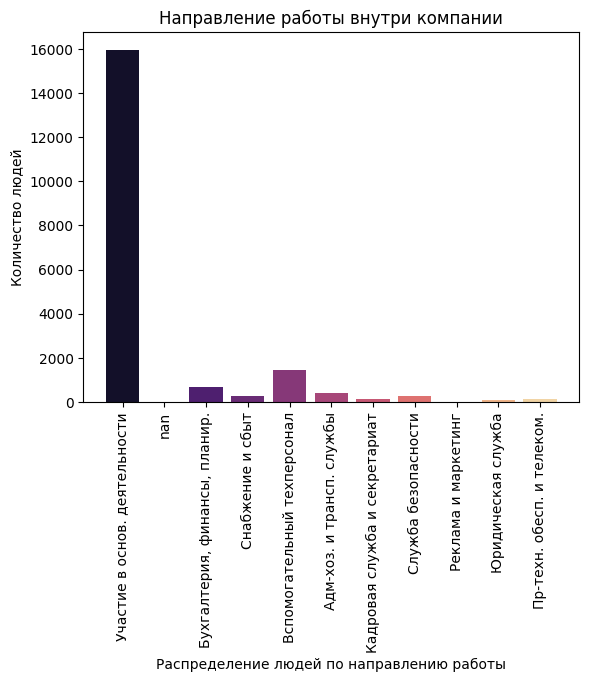

In [26]:
make_countplot('JOB_DIR', 'Направление работы внутри компании', 'Распределение людей по направлению работы',
               pd.unique(df['JOB_DIR']), pd.unique(df['JOB_DIR']))
#plt.savefig('pictures/work_dir.png')

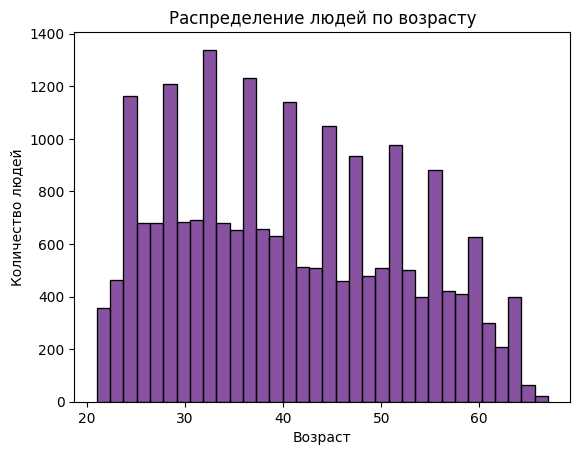

In [27]:
make_histplot('AGE', 'Возраст', 'Распределение людей по возрасту')
#plt.savefig('pictures/age.png')

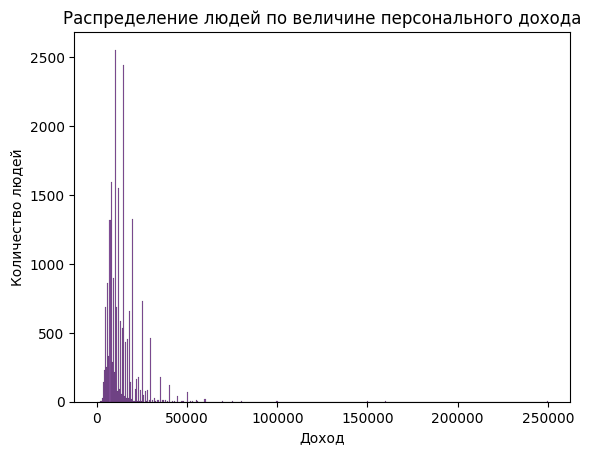

In [28]:
make_histplot('PERSONAL_INCOME', 'Доход', 'Распределение людей по величине персонального дохода')
#plt.savefig('pictures/personal_income.png')

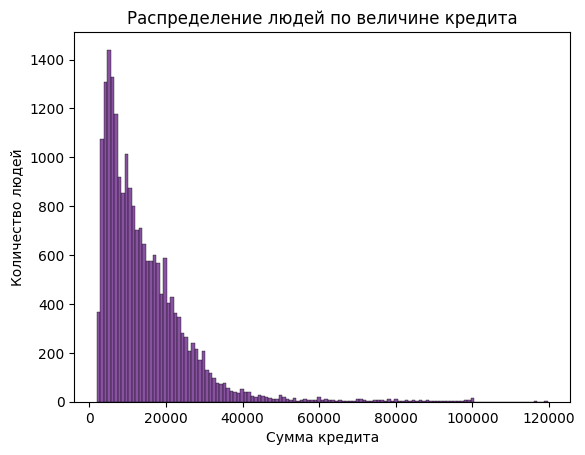

In [29]:
make_histplot('CREDIT', 'Сумма кредита', 'Распределение людей по величине кредита')
#plt.savefig('pictures/sum_credit.png')

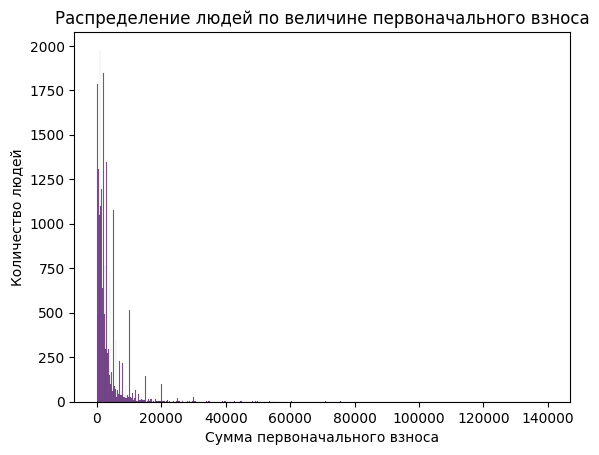

In [30]:
make_histplot('FST_PAYMENT', 'Сумма первоначального взноса',
              'Распределение людей по величине первоначального взноса')
#plt.savefig('pictures/first_payment.png')

## Корреляционный анализ

In [31]:
def plot_correlated_features(feature1, feature2):
    sns.scatterplot(x=df[feature1], y=df[feature2], color='#5f187f')
    plt.title(f'Скоррелированные признаки \n{feature1} и {feature2}')
    plt.show()

<Axes: >

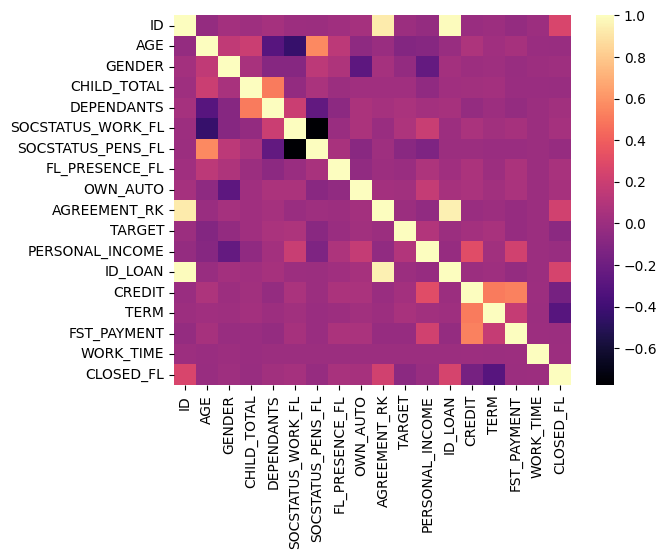

In [32]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='magma')

#plt.savefig('pictures/correlation.png')

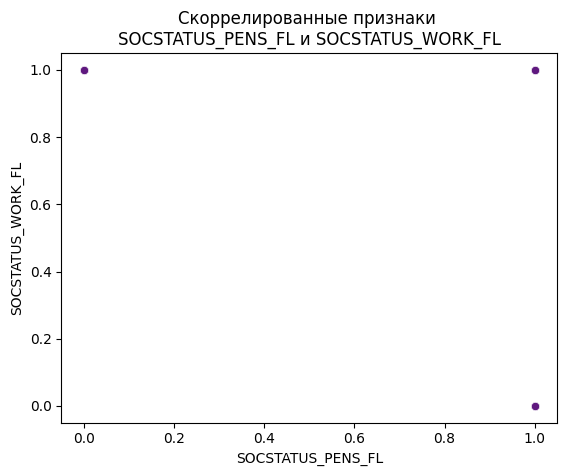

In [33]:
plot_correlated_features('SOCSTATUS_PENS_FL', 'SOCSTATUS_WORK_FL')

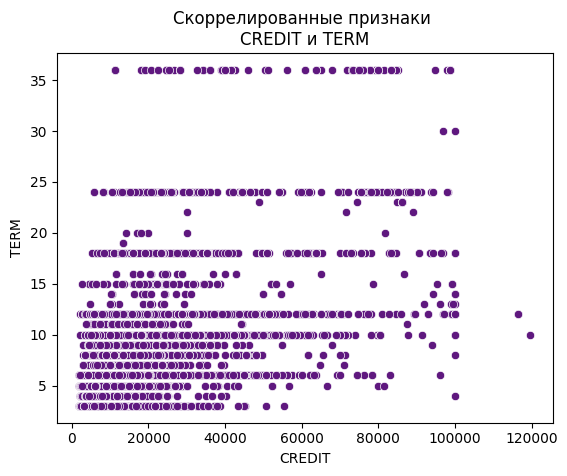

In [34]:
plot_correlated_features('CREDIT', 'TERM')

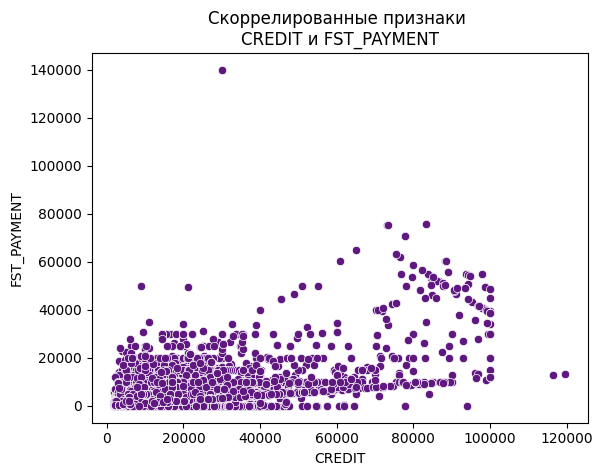

In [35]:
plot_correlated_features('CREDIT', 'FST_PAYMENT')
#plt.savefig('pictures/credit_fstpayment.png')

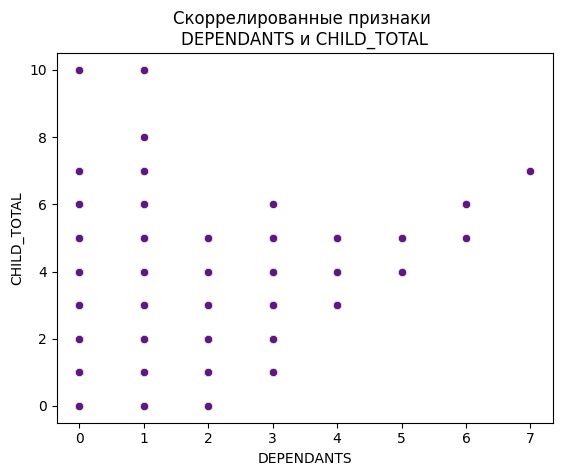

In [36]:
plot_correlated_features('DEPENDANTS', 'CHILD_TOTAL')
#plt.savefig('pictures/dependants_child.png')

## Графики зависимости с целевой переменной

In [37]:
def countplot_many_features(feature, rotation=False):
    sns.countplot(data=df, x=feature, hue='TARGET', palette='magma')
    if rotation == True:
        plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Количество людей')
    plt.title(f'Распределение людей по признаку {feature}')
    plt.show()

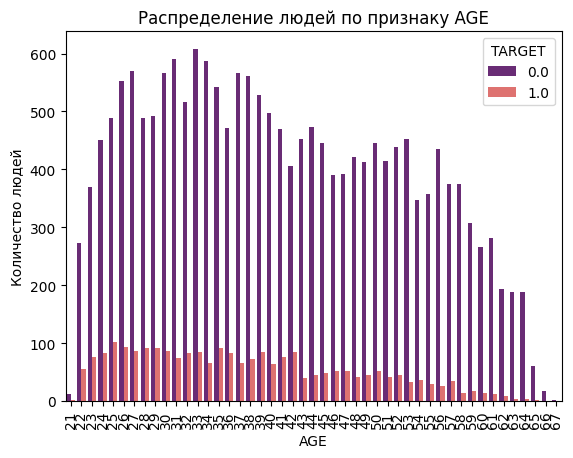

In [38]:
countplot_many_features('AGE', rotation=True)
#plt.savefig('pictures/age_target.png')

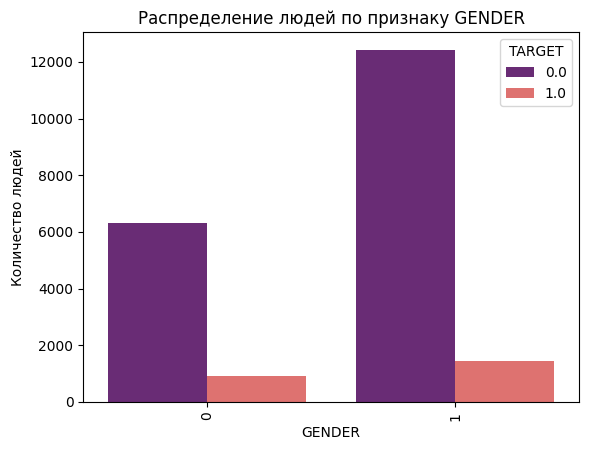

In [39]:
countplot_many_features('GENDER', rotation=True)
#plt.savefig('pictures/gender_target.png')

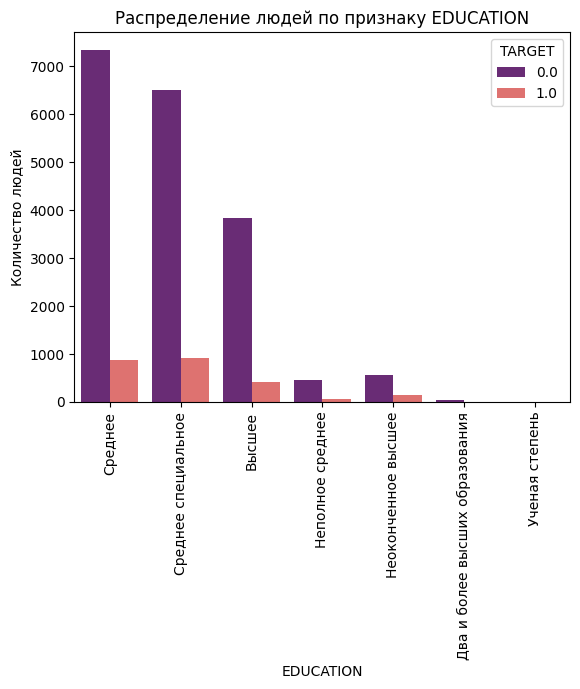

In [40]:
countplot_many_features('EDUCATION', rotation=True)
#plt.savefig('pictures/education_target.png')

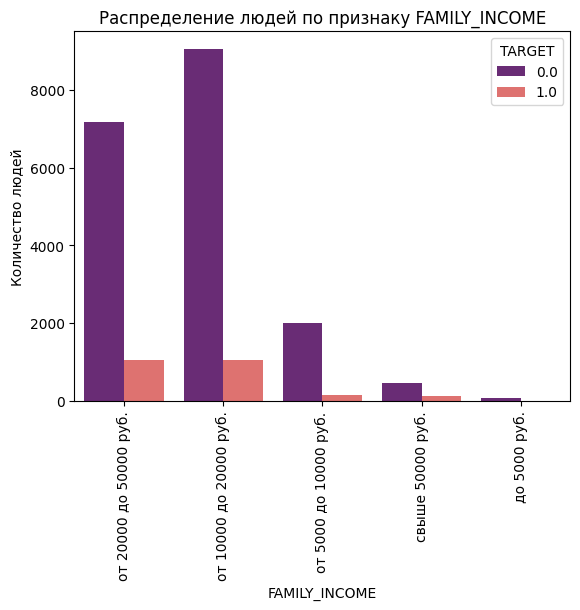

In [41]:
countplot_many_features('FAMILY_INCOME', rotation=True)
#plt.savefig('pictures/income_target.png')

In [42]:
description_cat = pd.read_csv('data/description_cat.csv', index_col='Unnamed: 0')
description_cat

,EDUCATION,MARITAL_STATUS,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FAMILY_INCOME,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,COMMENT,COMMENT_pens
count,21903,21903,21903,21903,21903,21126,19363,19363,19363,21903,21903
unique,7,5,81,81,80,5,31,12,10,2,2
top,Среднее,Состою в браке,Кемеровская область,Кемеровская область,Кемеровская область,от 10000 до 20000 руб.,Торговля,Специалист,Участие в основ. деятельности,не работает,пенсионер
freq,8454,13652,1257,1257,1257,10100,3294,11046,15963,20048,18995


## Обработка данных и feature engineering

In [43]:
df.isna().sum()

ID                            0
AGE                           0
GENDER                        0
EDUCATION                     0
MARITAL_STATUS                0
CHILD_TOTAL                   0
DEPENDANTS                    0
SOCSTATUS_WORK_FL             0
SOCSTATUS_PENS_FL             0
REG_ADDRESS_PROVINCE          0
FACT_ADDRESS_PROVINCE         0
POSTAL_ADDRESS_PROVINCE       0
FL_PRESENCE_FL                0
OWN_AUTO                      0
AGREEMENT_RK                777
TARGET                      777
FAMILY_INCOME               777
PERSONAL_INCOME             777
ID_LOAN                     777
CREDIT                      777
TERM                        777
FST_PAYMENT                 777
GEN_INDUSTRY               2540
GEN_TITLE                  2540
JOB_DIR                    2540
WORK_TIME                  2544
COMMENT                       0
COMMENT_pens                  0
CLOSED_FL                   777
dtype: int64

In [44]:
# заменим NaN модой для категориальных переменных и медианой для вещественных

mode_fillna = df[['FAMILY_INCOME', 'TERM', 'GEN_INDUSTRY',
                  'GEN_TITLE', 'JOB_DIR', 'CLOSED_FL']].mode()
median_fillna = df[['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'WORK_TIME']].median()

df[['FAMILY_INCOME', 'TERM', 'GEN_INDUSTRY',
    'GEN_TITLE', 'JOB_DIR', 'CLOSED_FL']] = df[['FAMILY_INCOME', 'TERM', 'GEN_INDUSTRY',
                                                'GEN_TITLE', 'JOB_DIR', 'CLOSED_FL']].fillna(mode_fillna)

df[['PERSONAL_INCOME', 'CREDIT',
    'FST_PAYMENT', 'WORK_TIME']] = df[['PERSONAL_INCOME', 'CREDIT',
                                       'FST_PAYMENT', 'WORK_TIME']].fillna(median_fillna)

In [45]:
# приведем распределение к нормальному

df['LOG_CREDIT'] = np.log(df['CREDIT'])
df['LOG_FST_PAYMENT'] = np.log(df['FST_PAYMENT'])
df['LOG_PERSONAL_INCOME'] = np.log(df['PERSONAL_INCOME'])

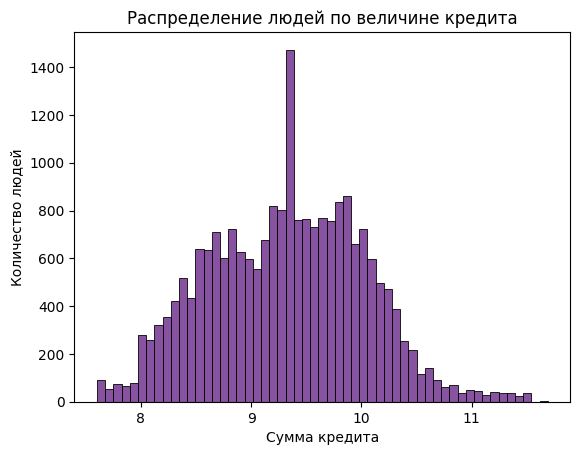

In [46]:
make_histplot('LOG_CREDIT', 'Сумма кредита', 'Распределение людей по величине кредита')

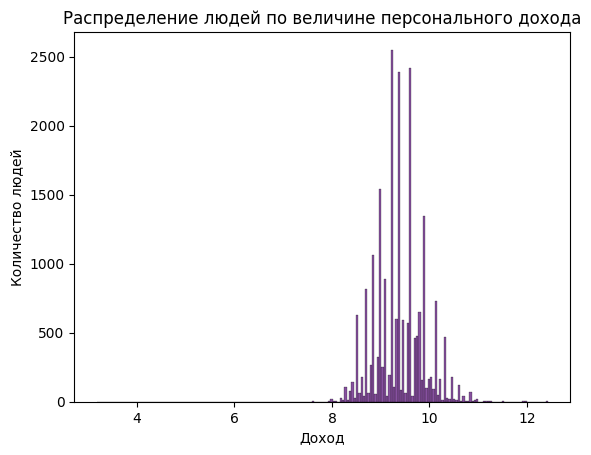

In [47]:
make_histplot('LOG_PERSONAL_INCOME', 'Доход', 'Распределение людей по величине персонального дохода')

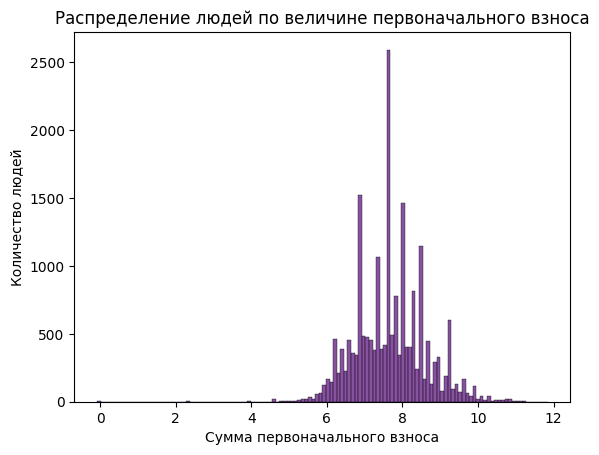

In [48]:
make_histplot('LOG_FST_PAYMENT', 'Сумма первоначального взноса',
              'Распределение людей по величине первоначального взноса')

In [49]:
# создадим признак возрастных групп
df['AGE_20_45'] = [1 if i <= 45 else 0 for i in df['AGE']]

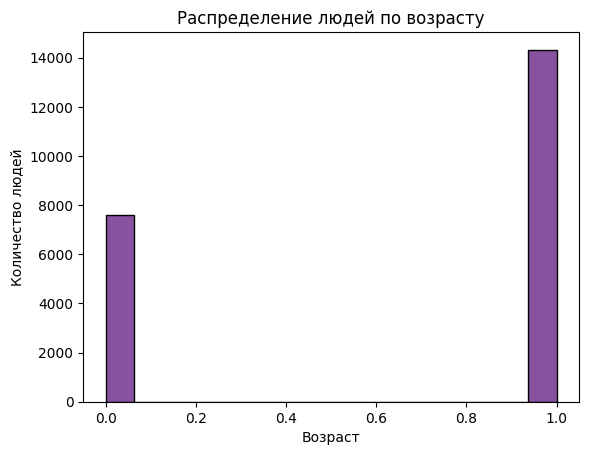

In [50]:
make_histplot('AGE_20_45', 'Возраст', 'Распределение людей по возрасту')

## Кодирование и масштабирование признаков

In [51]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [52]:
df.dropna(inplace=True)

In [53]:
X = df[['AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
        'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
        'FL_PRESENCE_FL', 'OWN_AUTO', 'FAMILY_INCOME', 'TERM',
        'WORK_TIME', 'CLOSED_FL', 'LOG_FST_PAYMENT',
        'LOG_PERSONAL_INCOME', 'LOG_CREDIT', 'AGE_20_45']]

y = df['TARGET']

In [54]:
enc_class = pd.get_dummies(X['EDUCATION'], drop_first=True)
X = pd.concat([X, enc_class], axis=1)
X.drop(columns=['EDUCATION'], axis=1, inplace=True)

In [55]:
enc_class = pd.get_dummies(X['MARITAL_STATUS'], drop_first=True)
X = pd.concat([X, enc_class], axis=1)
X.drop(columns=['MARITAL_STATUS'], axis=1, inplace=True)

In [56]:
enc_class = pd.get_dummies(X['FAMILY_INCOME'], drop_first=True)
X = pd.concat([X, enc_class], axis=1)
X.drop(columns=['FAMILY_INCOME'], axis=1, inplace=True)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17889 entries, 0 to 22311
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AGE                             17889 non-null  int64  
 1   GENDER                          17889 non-null  int64  
 2   CHILD_TOTAL                     17889 non-null  int64  
 3   DEPENDANTS                      17889 non-null  int64  
 4   SOCSTATUS_WORK_FL               17889 non-null  int64  
 5   SOCSTATUS_PENS_FL               17889 non-null  int64  
 6   FL_PRESENCE_FL                  17889 non-null  int64  
 7   OWN_AUTO                        17889 non-null  int64  
 8   TERM                            17889 non-null  float64
 9   WORK_TIME                       17889 non-null  float64
 10  CLOSED_FL                       17889 non-null  float64
 11  LOG_FST_PAYMENT                 17889 non-null  float64
 12  LOG_PERSONAL_INCOME             

## Моделирование

In [58]:
import sklearn
import xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [61]:
# определение модели
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
}
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Оценка значимости признаков: feature importances и SHAP

In [62]:
import matplotlib.pylab as pl

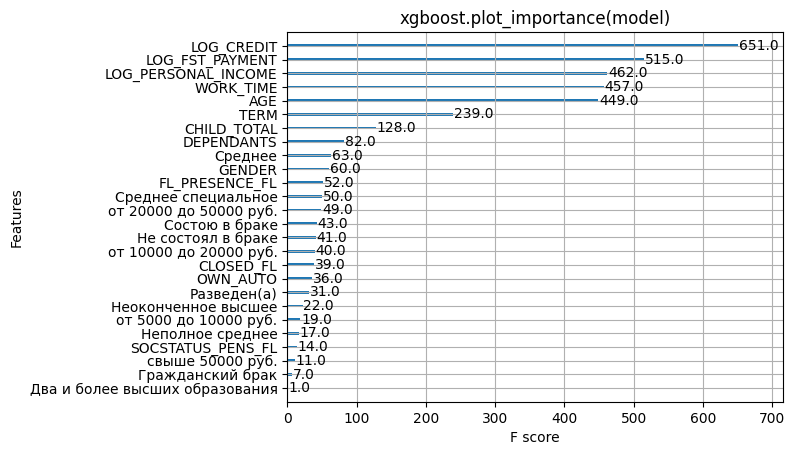

In [63]:
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [64]:
pip install shap

In [65]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

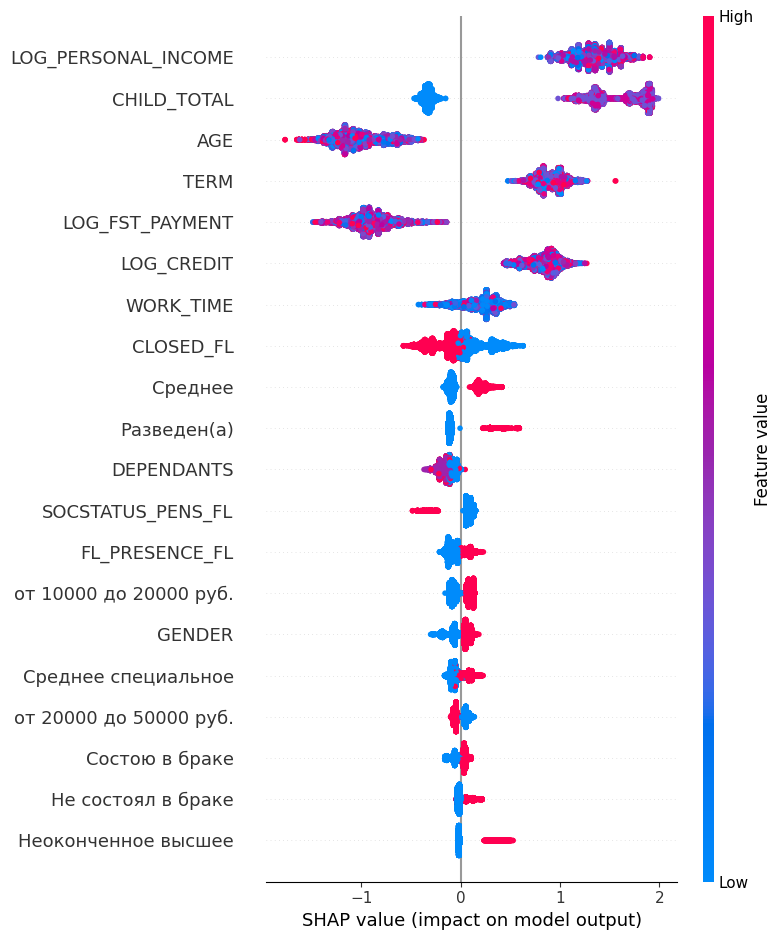

In [66]:
shap.summary_plot(shap_values, X)

In [68]:
X_train.columns

Index(['AGE', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'TERM', 'WORK_TIME',
       'CLOSED_FL', 'LOG_FST_PAYMENT', 'LOG_PERSONAL_INCOME', 'LOG_CREDIT',
       'AGE_20_45', 'Два и более высших образования', 'Неоконченное высшее',
       'Неполное среднее', 'Среднее', 'Среднее специальное', 'Ученая степень',
       'Гражданский брак', 'Не состоял в браке', 'Разведен(а)',
       'Состою в браке', 'от 10000 до 20000 руб.', 'от 20000 до 50000 руб.',
       'от 5000 до 10000 руб.', 'свыше 50000 руб.'],
      dtype='object')

In [73]:
from pickle import dump, load

with open("model.mw", "wb") as file:
    dump(model, file)